# Beta Bank

### Description

Beta Bank customers are leaving, little by little, every month. Bankers discovered that it is cheaper to save existing customers than to attract new ones.

We need to predict whether a customer will leave the bank soon. You have the data on the past behavior of clients and the termination of contracts with the bank.

Create a model with the maximum possible F1 value. To pass the review, you need an F1 value of at least 0.59. Check F1 for the test set.

Additionally, you should measure the AUC-ROC metric and compare it with the F1 value.

# Analyze the dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [37]:
data = pd.read_csv('datasets/Churn.csv')

In [3]:
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

I see categorical type columns which can influence the creation of my training model such as the 'Geography', 'Surname' and 'Gender' columns

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


# Change categorical columns with the dummies method to train the decision tree model

In [5]:
print(pd.get_dummies(data['Gender']).head(10))

   Female  Male
0       1     0
1       1     0
2       1     0
3       1     0
4       1     0
5       0     1
6       0     1
7       1     0
8       0     1
9       0     1


In [6]:
data_ohe = pd.get_dummies(data, drop_first=True)
print(data_ohe.head(3))

   RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0          1    15634602          619   42     2.0       0.00              1   
1          2    15647311          608   41     1.0   83807.86              1   
2          3    15619304          502   42     8.0  159660.80              3   

   HasCrCard  IsActiveMember  EstimatedSalary  ...  Surname_Zotova  \
0          1               1        101348.88  ...               0   
1          0               1        112542.58  ...               0   
2          1               0        113931.57  ...               0   

   Surname_Zox  Surname_Zubarev  Surname_Zubareva  Surname_Zuev  \
0            0                0                 0             0   
1            0                0                 0             0   
2            0                0                 0             0   

   Surname_Zuyev  Surname_Zuyeva  Geography_Germany  Geography_Spain  \
0              0               0                  0      

# Training sets

In [6]:
data = pd.read_csv('datasets/Churn.csv')

In [38]:
# Make a drop to the columns of RowNumber, CustomerId and Surname
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [39]:
# Check if there are NaN values in the data set
if data.isnull().sum().sum() > 0:
    print("The data set contains NaN values.")
    print("Deleting rows with NaN values...")
    data.dropna(inplace=True)


El conjunto de datos contiene valores NaN.
Eliminando filas con valores NaN...


In [40]:
# Convert categorical variables into numeric ones with One-Hot
data = pd.get_dummies(data, columns=['Gender', 'Geography'], drop_first=True)

In [25]:
# Separate data into characteristics and objective
target = data['Exited']
features = data.drop('Exited', axis=1)

In [41]:
# Check the maximum and minimum values in each column to ensure that there are no values that are too large
print("Data set description::")
print(data.describe())


Descripción del conjunto de datos:
       CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  9091.000000  9091.000000  9091.000000    9091.000000    9091.000000   
mean    650.736553    38.949181     4.997690   76522.740015       1.530195   
std      96.410471    10.555581     2.894723   62329.528576       0.581003   
min     350.000000    18.000000     0.000000       0.000000       1.000000   
25%     584.000000    32.000000     2.000000       0.000000       1.000000   
50%     652.000000    37.000000     5.000000   97318.250000       1.000000   
75%     717.000000    44.000000     7.000000  127561.890000       2.000000   
max     850.000000    92.000000    10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary       Exited  Gender_Male  \
count  9091.000000     9091.000000      9091.000000  9091.000000  9091.000000   
mean      0.704983        0.515565    100181.214924     0.203938     0.547135   
std       0.456076 

In [42]:
# Fill the remaining NaN values with the mean
data.fillna(data.mean(), inplace=True)


In [43]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

# Generate the linear regression model

In [44]:
# Separate data into training and test sets
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

In [45]:
# train the model
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

LogisticRegression(random_state=12345, solver='liblinear')

In [47]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

In [49]:
# Get F1
predicted_test = model.predict(features_test)
f1 = f1_score(target_test, predicted_test)
print(f"F1 score on test data:: {f1}")

Puntaje F1 en los datos de prueba: 0.008733624454148471


In [1]:
#features_downsampled, target_downsampled = downsample(
#    features_train, target_train, 0.1
#)

In [2]:
#print(features_downsampled.shape)
#print(target_downsampled.shape)

# Graph

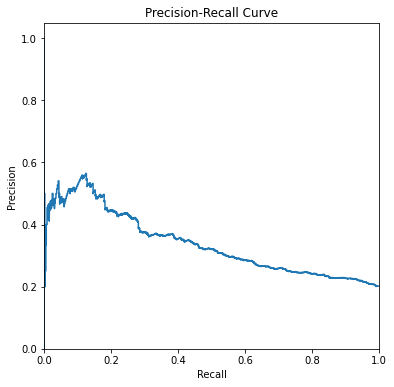

In [52]:
probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(
    target_valid, probabilities_valid[:, 1]
)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

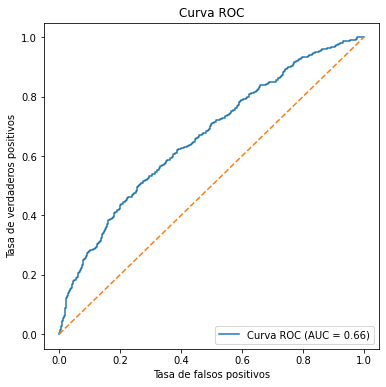

In [53]:
# ROC curve
probabilities = model.predict_proba(features_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Based on the ROC curve: I can say that the model is able to distinguish well between positive and negative rates, regardless of the classification threshold used. This indicates that the model has good discrimination ability and is able to correctly classify most of the observations in the data set.

# Conclusion

In this case, an F1 score of 0.48437499999999994 indicates that the decision tree model has relatively low accuracy on the test data set.

Therefore, it would be advisable to investigate and obtain more data to be able to train a better